In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib
from dgm_library_ergodic import env_initializing, sample_room, init_DGM, train, warmstart_sol,compute_loss

from DGM import * # NOQA
import numpy as np
import keras
import pandas as pd
from tensorflow.python.ops.numpy_ops import np_config

env_initializing()

DTYPE = 'float32'

verbose = 1

In [2]:
Phi_theta = init_DGM(RNN_layers = 0, FNN_layers=2, nodes_per_layer=200,activation="relu")
Gamma_theta = init_DGM(RNN_layers = 0, FNN_layers=2, nodes_per_layer=200,activation="relu")

phi = np.genfromtxt('phi.txt')
gamma = np.genfromtxt('gamma.txt')

Phi_theta,Gamma_theta, X0  = warmstart_sol(Phi_theta,Gamma_theta,phi,gamma,2)

------ preprocessing for Gamma_theta ------
Gamma_theta It 00000: loss = 2.51992889e+02
Gamma_theta It 00100: loss = 1.81806717e+01
Gamma_theta It 00200: loss = 1.17081137e+01
Gamma_theta It 00300: loss = 7.82125998e+00
Gamma_theta It 00400: loss = 5.69828653e+00
Gamma_theta It 00500: loss = 4.47218561e+00
Gamma_theta It 00600: loss = 3.77043509e+00
Gamma_theta It 00700: loss = 3.30763388e+00
Gamma_theta It 00800: loss = 2.98339176e+00
Gamma_theta It 00900: loss = 2.74638486e+00
Gamma_theta It 01000: loss = 2.56460619e+00
------ preprocessing  for Phi_theta------
Phi_theta It 00000: loss = 8.27185440e+01
Phi_theta It 00100: loss = 1.12934980e+01
Phi_theta It 00200: loss = 4.49514341e+00
Phi_theta It 00300: loss = 2.89552569e+00
Phi_theta It 00400: loss = 2.35451579e+00
Phi_theta It 00500: loss = 2.04803109e+00
Phi_theta It 00600: loss = 1.83913004e+00
Phi_theta It 00700: loss = 1.66970134e+00
Phi_theta It 00800: loss = 1.53219569e+00
Phi_theta It 00900: loss = 1.41708338e+00
Phi_theta 

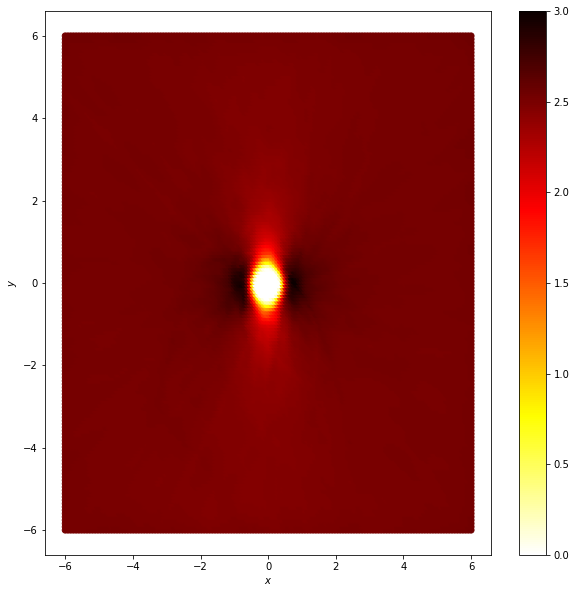

In [3]:
x = X0.iloc[:,0]
y = X0.iloc[:,1]
m = Gamma_theta(X0)*Phi_theta(X0)

fig = plt.figure(figsize=(10,10))
plt.scatter(x, y, c=m, cmap='hot_r')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.clim([0,3])
plt.colorbar()
plt.show()

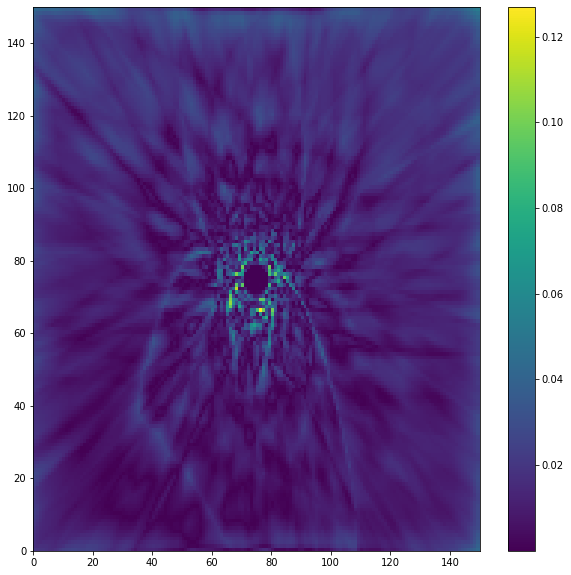

In [4]:
m_theta = m.numpy().reshape(150,150)
m_sol = phi*gamma
fig = plt.figure(figsize=(10,10))
plt.pcolor(abs(m_sol-m_theta))
plt.colorbar()
plt.show()

In [5]:
X_b, X_s, X_c = sample_room(0)

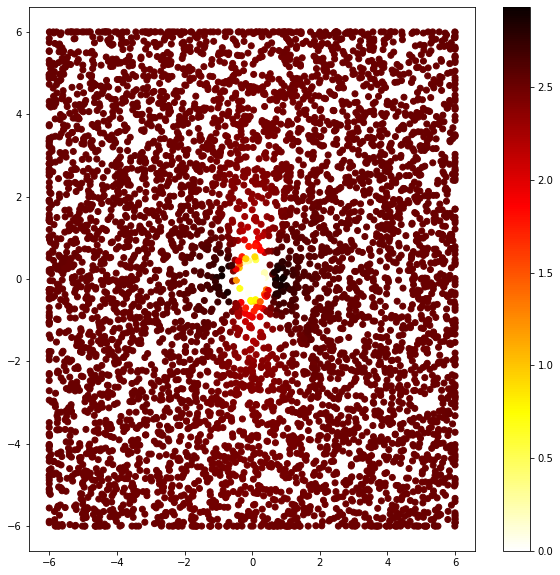

In [6]:
X0 = pd.concat([X_b,X_s,X_c])
x = X0.iloc[:,0]
y = X0.iloc[:,1]
m = Gamma_theta(X0)*Phi_theta(X0)
fig = plt.figure(figsize=(10,10))
plt.scatter(x, y, c=m, cmap='hot_r')
plt.colorbar()
plt.show()

In [26]:
from dgm_library_ergodic import get_derivatives

grad, h = get_derivatives(Phi_theta,tf.Variable(X0,dtype = DTYPE))
grad = grad.numpy()
grad.shape

tf.Tensor(
[[[-5.1047723e-03  2.2903378e-03]]

 [[ 1.7783906e-03 -7.1858019e-03]]

 [[-1.4717836e-02 -1.4209290e-02]]

 ...

 [[-1.5463961e+01 -3.3654766e+01]]

 [[-1.7122074e+00  7.3730934e-01]]

 [[-1.4007986e-01  2.7511707e-01]]], shape=(5400, 1, 2), dtype=float32)
tf.Tensor(
[[[[0. 0.]
   [0. 0.]]]


 [[[0. 0.]
   [0. 0.]]]


 [[[0. 0.]
   [0. 0.]]]


 ...


 [[[0. 0.]
   [0. 0.]]]


 [[[0. 0.]
   [0. 0.]]]


 [[[0. 0.]
   [0. 0.]]]], shape=(5400, 1, 2, 2), dtype=float32)


(5400, 1, 2)

In [27]:
norm = np.sqrt(grad[:,0,0]**2 + grad[:,0,1]**2)

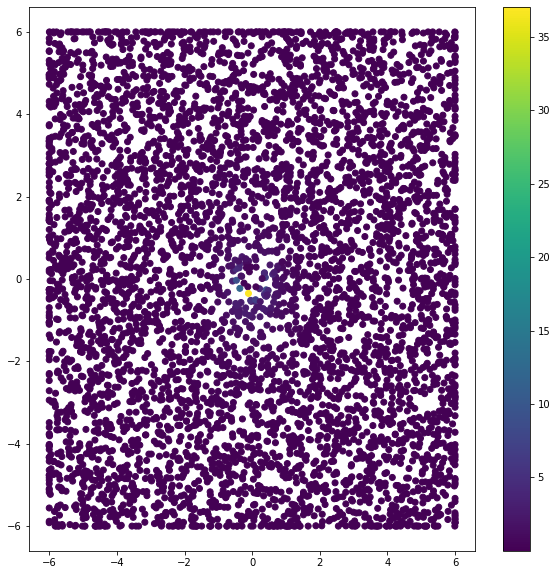

In [39]:
plt.figure(figsize=(10,10))
plt.scatter(x,y,c=norm)
plt.colorbar()
plt.show()

In [38]:
(h.numpy()==0).all()nor

True